## Golden Search

Final interval: [1.52800, 1.52801]
Estimated minimum x*: 1.52800
Function value at minimum: 0.22278


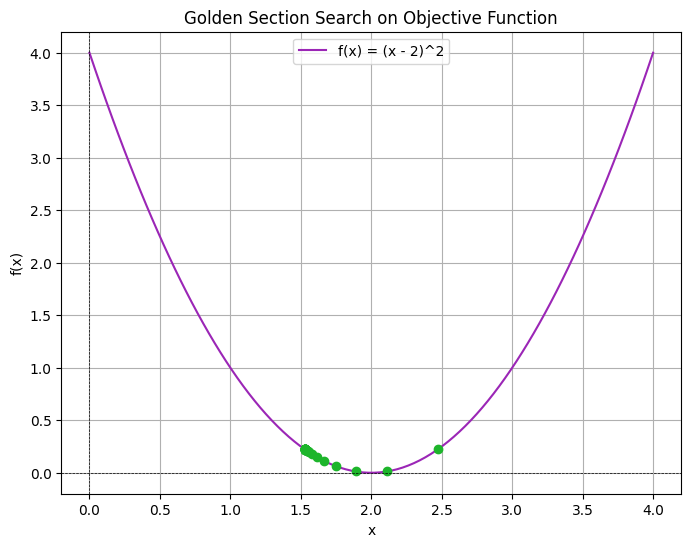

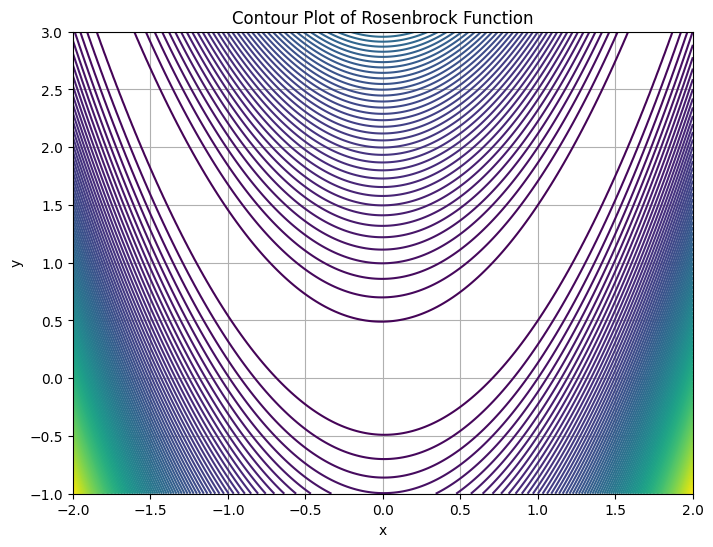

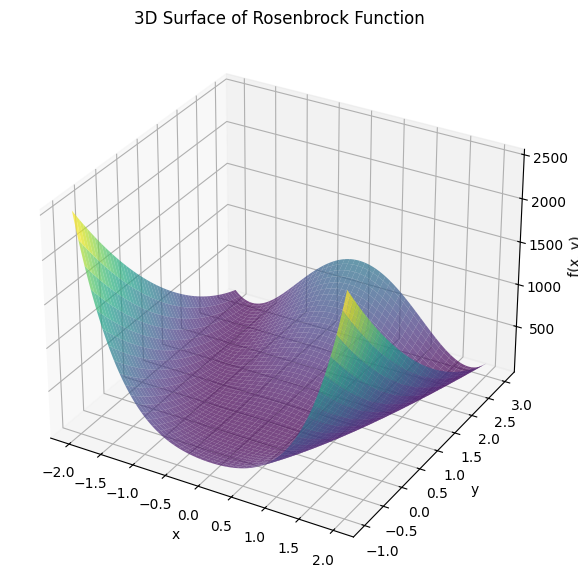

In [2]:

"""
Golden Section Search: A Numerical Optimization Approach

The Golden Section Search is a method designed to locate the minimum of a unimodal function.
It iteratively reduces the search interval by using the golden ratio, which enables efficient narrowing of the search range to converge towards the optimal solution.

Process Overview:
1. Define the initial range [start, end].
2. Use the golden ratio to calculate two interior points within the range.
3. Evaluate the function at these points.
4. Based on function values, adjust the search interval:
   - If the value at the first point is smaller, the new search range is [start, second_point].
   - Otherwise, the range becomes [first_point, end].
5. Repeat this process until the search interval is sufficiently small or the maximum number of iterations is reached.
6. The estimated minimum is computed as the midpoint of the final range.

This method is commonly applied in optimization problems, particularly where the cost of evaluating the function is high, as it minimizes the number of evaluations.
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class GoldenSection:
    def __init__(self, func, left, right, tolerance=1e-5, max_iters=100):
        self.func = func
        self.left = left
        self.right = right
        self.tolerance = tolerance
        self.max_iters = max_iters
        self.ratio = 0.618  # Approximation of the golden ratio
        self.evaluations = []  # Track function evaluations

    def find_minimum(self):
        low = self.left
        high = self.right

        point1 = high - self.ratio * (high - low)
        point2 = low + self.ratio * (high - low)

        f1 = self.func(point1)
        f2 = self.func(point2)

        iteration = 1

        while (high - low) > self.tolerance and iteration < self.max_iters:
            self.evaluations.append((point1, f1))

            if f1 < f2:
                high = point2
                point2 = point1
                point1 = high - self.ratio * (high - low)
                f1 = self.func(point1)
            else:
                low = point1
                point1 = point2
                point2 = low + self.ratio * (high - low)
                f2 = self.func(point2)

            iteration += 1

        min_point = (low + high) / 2
        return low, high, min_point, self.func(min_point)

def objective_function(x):
    return (x - 2) ** 2

def rosenbrock_function(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

def plot_objective_function(evaluations, start, end):
    x_vals = np.linspace(start, end, 100)
    y_vals = objective_function(x_vals)

    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals, label='f(x) = (x - 2)^2', color='#9B26B6')

    for point, value in evaluations:
        plt.plot(point, value, 'o', color='#1DB52B')

    plt.title('Golden Section Search on Objective Function')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_rosenbrock_contour():
    x_vals = np.linspace(-2, 2, 200)
    y_vals = np.linspace(-1, 3, 200)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = rosenbrock_function(X, Y)

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=100, cmap='viridis')
    plt.title("Contour Plot of Rosenbrock Function")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

def plot_rosenbrock_3d():
    x_vals = np.linspace(-2, 2, 200)
    y_vals = np.linspace(-1, 3, 200)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = rosenbrock_function(X, Y)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

    ax.set_title("3D Surface of Rosenbrock Function")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")
    plt.show()

# Main execution
if __name__ == "__main__":
    start = 0
    end = 4

    optimizer = GoldenSection(objective_function, start, end, tolerance=1e-5, max_iters=100)
    left_interval, right_interval, estimated_min, min_value = optimizer.find_minimum()

    print(f"Final interval: [{left_interval:.5f}, {right_interval:.5f}]")
    print(f"Estimated minimum x*: {estimated_min:.5f}")
    print(f"Function value at minimum: {min_value:.5f}")

    # Plot the objective function with evaluations
    plot_objective_function(optimizer.evaluations, start, end)
    # Plot the Rosenbrock function contour
    plot_rosenbrock_contour()
    # Plot the 3D surface of the Rosenbrock function
    plot_rosenbrock_3d()
